# <span style='color:OrangeRed'>V2 Z-TRANSFORMATION - TEIL 1</span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Hier vergleichen und überprüfen wir verschiedene Methoden zur Berechnung der Inverse der z-Transformation.

In [1]:
% Necessary to use control toolbox
pkg load control
clear all

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Ein bestimmtes Signal wird durch seine z-Transformation beschrieben, für die wir Zähler und Nenner kennen.

In [2]:
num = [6 0]
den = [1 -4 3]
G = tf(num,den,1)

num =

   6   0

den =

   1  -4   3


Transfer function 'G' from input 'u1' to output ...

           6 z     
 y1:  -------------
      z^2 - 4 z + 3

Sampling time: 1 s
Discrete-time model.


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Erste Option ist eine Potenzreihenentwicklung, d.h. wir wenden die Division von Zähler und Nenner mehrfach an:

In [ ]:
k=0:4;
[x(1) r] = deconv(num,den)

for j = 1:4
    numnew = conv(r,[1 0])
    [p r] = deconv(numnew,den)
    x(j+1) = p(length(p))
end

plot(k,x)




x = 0
r =

   6   0

numnew =

   6   0   0

p =  6
r =

    0   24  -18

x =

   0   6

numnew =

    0   24  -18    0

p =

    0   24

r =

    0    0   78  -72

x =

    0    6   24

numnew =

    0    0   78  -72    0

p =

    0    0   78

r =

     0     0     0   240  -234

x =

    0    6   24   78

numnew =

     0     0     0   240  -234     0

p =

     0     0     0   240

r =

     0     0     0     0   726  -720

x =

     0     6    24    78   240



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    
Zunächst beginnen wir mit der Partialbruchzerlegung. In Matlab/Octave gibt es die Funktion <code>residue</code>.
Diese Funktion wird verwendet, um einen Bruch in Terme des Typs a/(z-b) zu zerlegen.
Dann müssen wir zunächst den Zähler durch z dividieren und dann die Funktion verwenden.

In [5]:
numz = deconv(num, [1 0])
[r,p,q]=residue(numz,den)

numz =  6
r =

   3.0000
  -3.0000

p =

   3
   1

q = [](0x0)


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
r sind die Koeffizienten für die Zähler, p sind die Pole

das Signal ist dann die Summe von Termen des Typs r*p^k

In [6]:
npoles = length(p)

for i=1:npoles
   s(i,:) = r(i).*p(i).^k
end
   

npoles =  2
s =

     3.0000     9.0000    27.0000    81.0000   243.0000

s =

     3.0000     9.0000    27.0000    81.0000   243.0000
    -3.0000    -3.0000    -3.0000    -3.0000    -3.0000



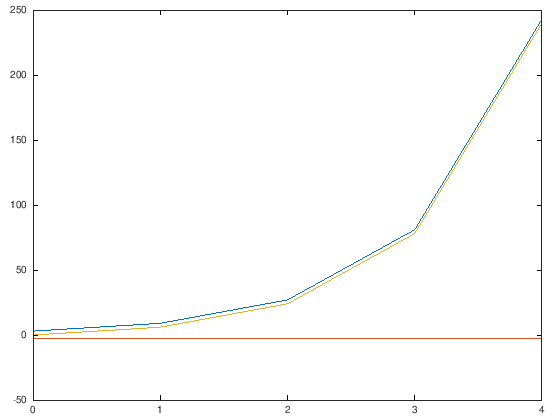

In [7]:
plot(k,s(1,:),k,s(2,:),k,s(1,:)+s(2,:))

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Wir können das Ergebnis auch mit Hilfe der symbolischen Toolbox überprüfen.

In [8]:
pkg load symbolic
syms z

Symbolic pkg v2.8.0: Python communication link active, SymPy v1.5.1.


In [17]:
F= 6*z/(z^2-4*z+3)
F1 = F*1/z
G1 = partfrac(F1)
Gs = expand(G1*z)

F = (sym)

      6⋅z     
  ────────────
   2          
  z  - 4⋅z + 3

F1 = (sym)

       6      
  ────────────
   2          
  z  - 4⋅z + 3

G1 = (sym)

      3       3  
  - ───── + ─────
    z - 1   z - 3

Gs = (sym)

     3⋅z     3⋅z 
  - ───── + ─────
    z - 1   z - 3



<div style="font-family: 'times'; font-size: 13pt; text-align: justify">

Per Definition ist dies auch die Impulsantwort der Übertragungsfunktion, was wir wiederum mit der Funktion <code>impulse</code> aus Matlab/Octave überprüfen können.

x2 =

     0
     6
    24
    78
   240
   726



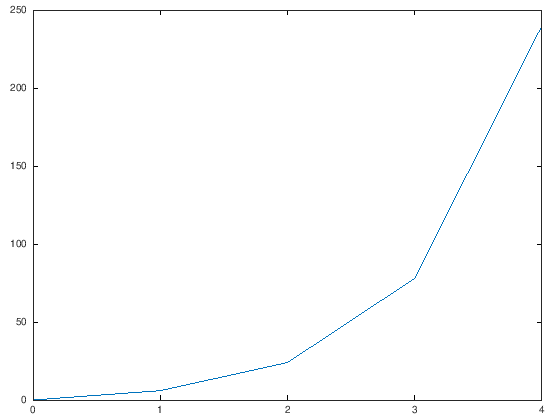

In [8]:
x2 = impulse(G)
plot(k,x2(1:5))